# **Sentiment Analysis of IMDB Movie Reviews**

#### Problem Statement:

In this, we have to predict the number of positive, neutral and negative reviews based on sentiments by using Logistic Regression.

In [1]:
# import python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [36]:
# import csv file in your path
vn_reviews = pd.read_csv('/violent_ nature_reviews.csv')
vn_reviews.head()

,Comments,Ratings
0,Disclaimer: this film is only intended for sla...,7
1,I try to rate films for what they're suppose t...,6
2,In a violent nature is a slasher film shot mos...,5
3,Decent concept that just turns out insanely bo...,7
4,"This was scary, suspenseful, graphic and funny...",3


### **Exploratery data analysis**

In [3]:
vn_reviews.shape

(6900, 2)

In [4]:
vn_reviews.describe()

,Ratings
count,6900.000000
mean,5.173913
std,2.548026
min,1.000000
25%,3.000000
50%,6.000000
75%,7.000000
max,9.000000


In [5]:
vn_reviews.isnull().sum()

,0
Comments,0
Ratings,0


#### **Sentiment count**

In [6]:
vn_reviews.Ratings.value_counts()

,count
Ratings,
7,1500
6,1500
1,1200
8,900
3,600
5,300
4,300
2,300
9,300


#### **Data Visualization**

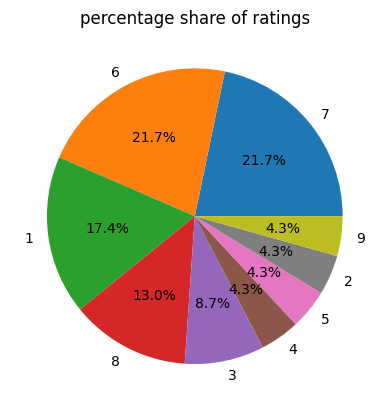

In [7]:
plt.pie(vn_reviews.Ratings.value_counts(), labels=[7,6,1,8,3,4,5,2,9], autopct='%1.1f%%')
plt.title('percentage share of ratings')
plt.show()

Minimum of the viewers of the movie 'in A Violent Nature' have reviewed as a good flim with the percentage of 4.3%

Based the value counts of the ratings, we can assume that the Positive ratings would be around ratings of 7,8,9
, the Neutral ratings of 4,5,6 stars and the negative ratings of 1,2,3 stars.

#Replacing the values of 7-9 as positive comments or 1
#values of 4-6 as neutral comments or 0
#values of 1-3 as negative comments or -1

In [8]:
vn={1:-1, 2:-1, 3:-1, 4:0, 5:0, 6:0, 7:1, 8:1, 9:1}
vn_reviews['Ratings']=vn_reviews['Ratings'].replace(vn)
vn_reviews['Ratings'].value_counts()

,count
Ratings,
1,2700
0,2100
-1,2100


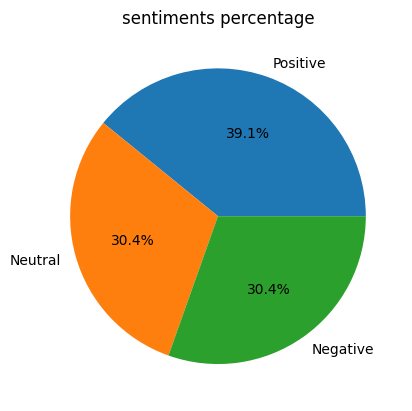

In [9]:
plt.pie(vn_reviews.Ratings.value_counts(),labels=['Positive','Neutral','Negative'], autopct='%1.1f%%')
plt.title('sentiments percentage')
plt.show()

In [37]:
from transformers import pipeline

In [38]:
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english", truncation=True)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [39]:
def analyze_sentiment(text):
    # Truncate if the text exceeds 512 tokens
    return sentiment_pipeline(text[:512])[0]['label']

In [41]:
vn_reviews['Sentiment'] = vn_reviews['Comments'].apply(analyze_sentiment)

In [42]:
vn_reviews.head()

,Comments,Ratings,Sentiment
0,Disclaimer: this film is only intended for sla...,7,NEGATIVE
1,I try to rate films for what they're suppose t...,6,POSITIVE
2,In a violent nature is a slasher film shot mos...,5,NEGATIVE
3,Decent concept that just turns out insanely bo...,7,NEGATIVE
4,"This was scary, suspenseful, graphic and funny...",3,POSITIVE


In [43]:
vn_reviews['Sentiment_Binary'] = vn_reviews['Sentiment'].apply(lambda x: 1 if x == 'POSITIVE' else 0)

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [44]:
tfidf = TfidfVectorizer(max_features=5000)
x = tfidf.fit_transform(vn_reviews['Comments']).toarray()
y = vn_reviews['Sentiment_Binary']

In [46]:
train_comments, test_comments, train_sentiments, test_sentiments = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
lr_model = LogisticRegression()
lr_model.fit(train_comments,train_sentiments)

LogisticRegression()

In [50]:
y_pred = lr_model.predict(test_comments)

In [51]:
print("Classification Report:\n", classification_report(test_sentiments, y_pred))
print("Accuracy Score: ", accuracy_score(test_sentiments, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       833
           1       1.00      1.00      1.00       547

    accuracy                           1.00      1380
   macro avg       1.00      1.00      1.00      1380
weighted avg       1.00      1.00      1.00      1380

Accuracy Score:  1.0


In [29]:
print(confusion_matrix(y_pred_train,y_train))

[[1470    0    0]
 [   0 1470    0]
 [   0    0 1890]]


In [53]:
from wordcloud import WordCloud

In [56]:
#Creating word cloud for all comments
all_comments = ' '.join(vn_reviews['Comments'])
wordcloud_all = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_comments)

# Creating word clouds for positive comments
positive_comments = ' '.join(vn_reviews[vn_reviews['Sentiment'] == 'POSITIVE']['Comments'])
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(positive_comments)

# Creating word clouds for negative comments
negative_comments = ' '.join(vn_reviews[vn_reviews['Sentiment'] == 'NEGATIVE']['Comments'])
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(negative_comments)

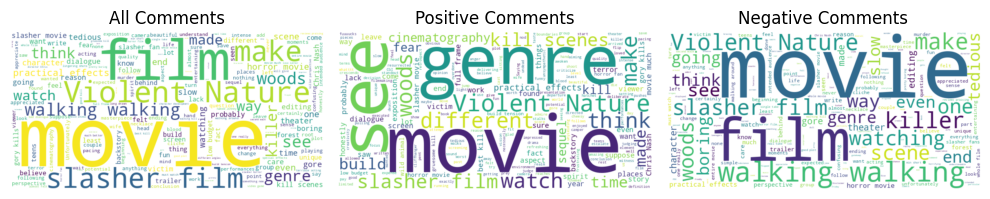

In [57]:
plt.figure(figsize=(10, 5))
# All comments
plt.subplot(1, 3, 1)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.title('All Comments')
plt.axis('off')

# Positive comments
plt.subplot(1, 3, 2)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Comments')
plt.axis('off')

# Negative comments
plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Comments')
plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()